# Admissions 
#### Analyze graduate acceptance using R programming.
Bus471 Data Analytics; Illinois State University; Scott Schmidt

# View Data

In [1]:
install.packages("xlsx")
library("xlsx")
library(data.table)
library(caret)
library(gbm)
library(ggplot2)
options(warn=-1)

file='../input/admissions/admissions.xlsx'
df= read.xlsx(file, 1, header=TRUE)
head(df)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rJava’, ‘xlsxjars’


Loading required package: ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


Loaded gbm 2.1.8



,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3
2,1,660,3.67,3
3,1,800,4.00,1
4,1,640,3.19,4
5,0,520,2.93,4
6,1,760,3.00,2


In [2]:
summary(df);

     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

# Treat Missing Values

In [3]:
df <- na.omit(df)

# Acceptance Analysis

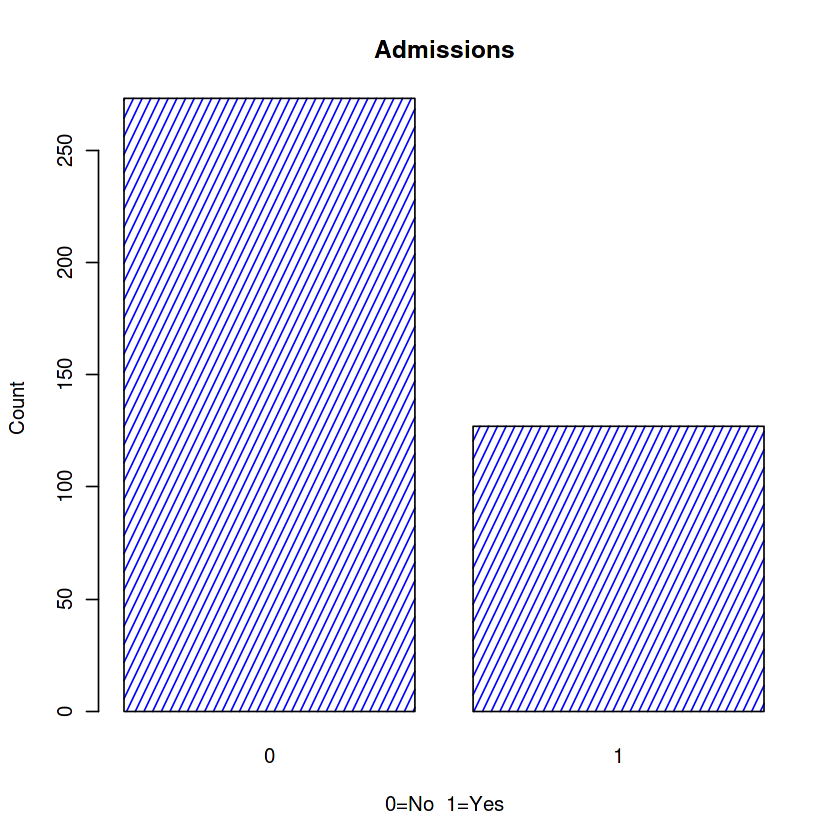

In [4]:
barplot(table(df$admit),
main="Admissions",
xlab="0=No  1=Yes",
ylab="Count",
border="black",
col="blue",
density=10
)

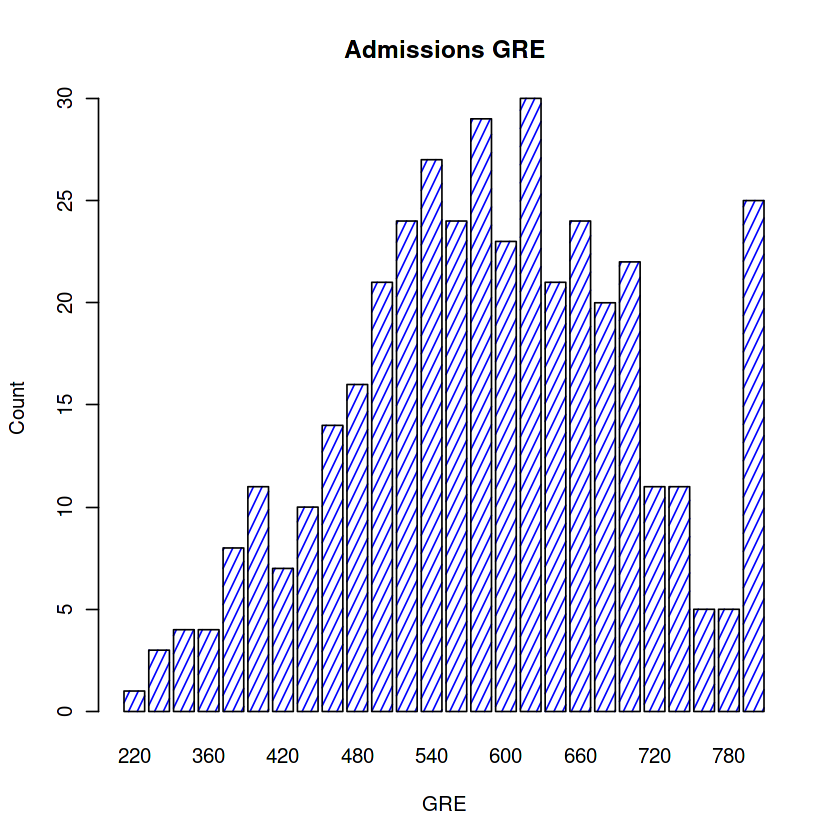

In [5]:
barplot(table(df$gre),
main="Admissions GRE",
xlab="GRE",
ylab="Count",
border="black",
col="blue",
density=10
)

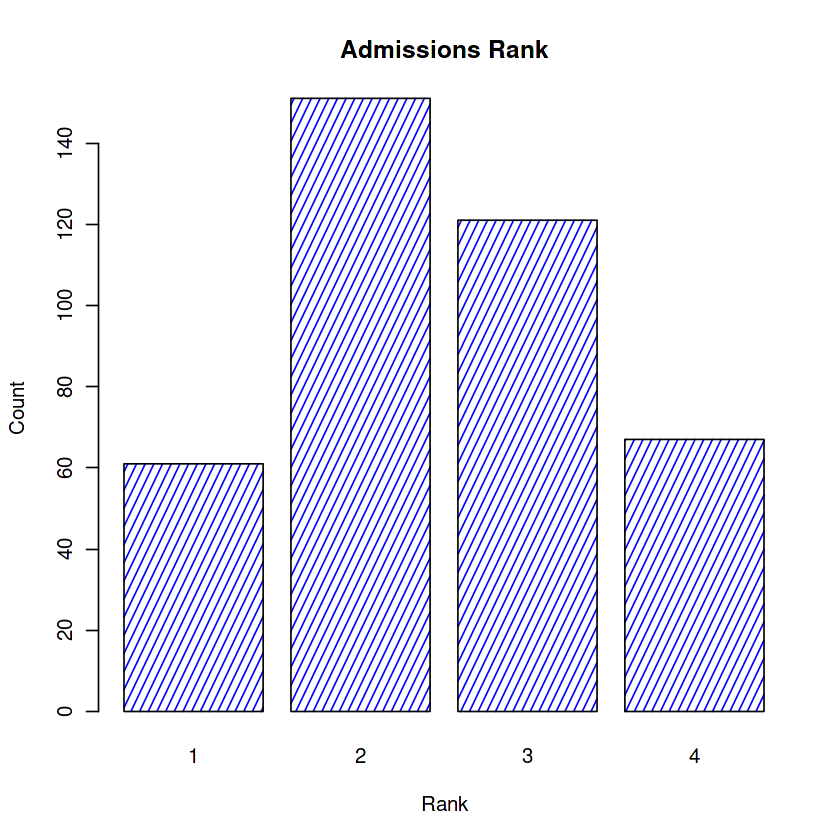

In [6]:
barplot(table(df$rank),
main="Admissions Rank",
xlab="Rank",
ylab="Count",
border="black",
col="blue",
density=10
)

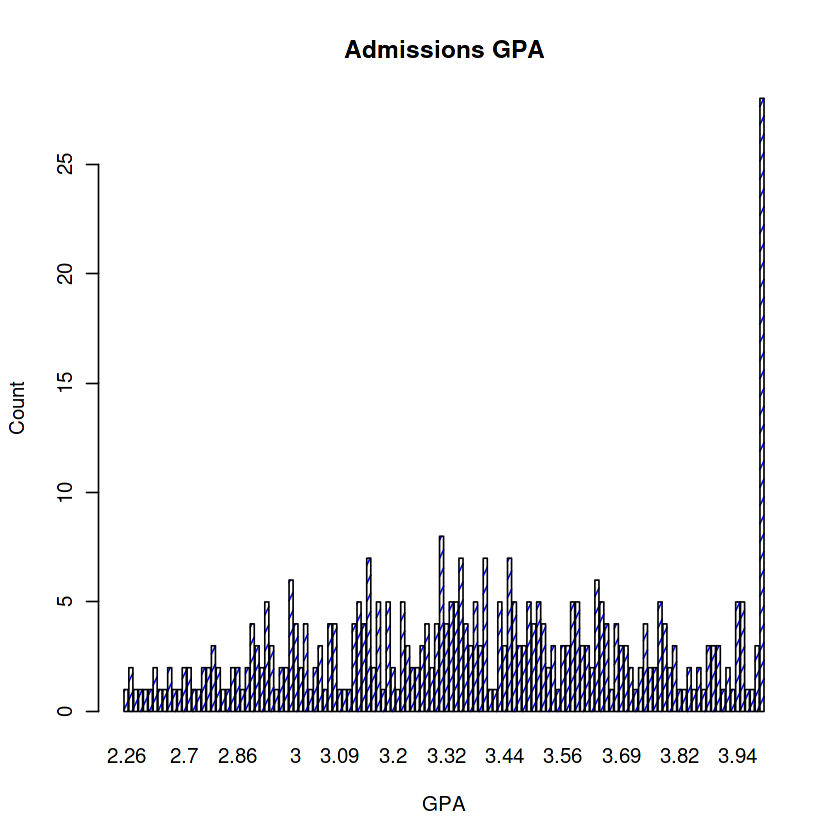

In [7]:
barplot(table(df$gpa),
main="Admissions GPA",
xlab="GPA",
ylab="Count",
border="black",
col="blue",
density=10
)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



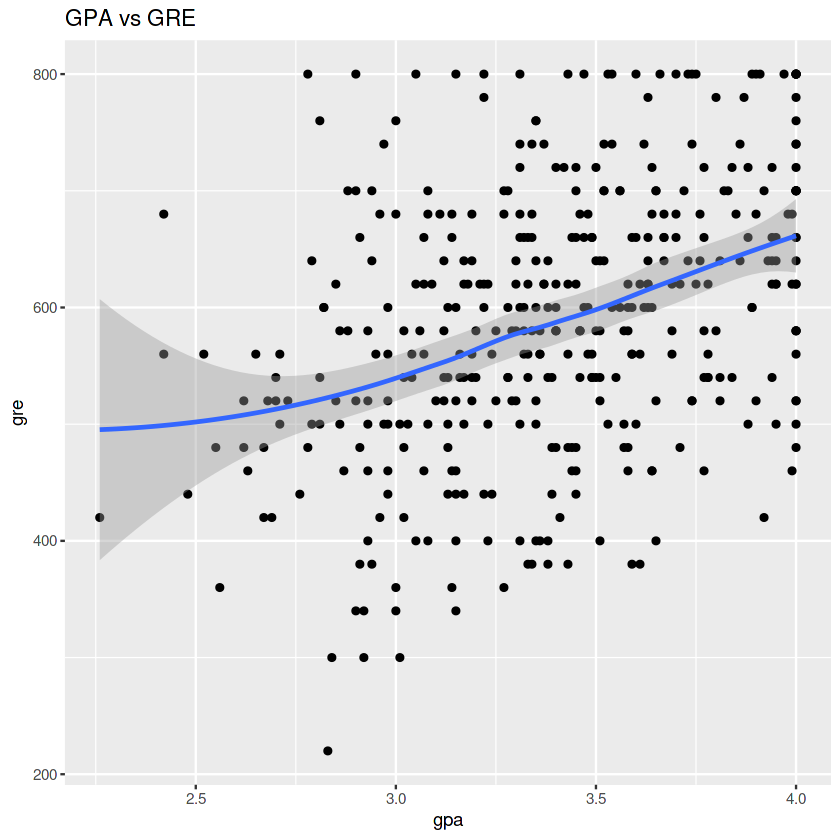

In [8]:
ggplot(df, aes(x=gpa, y=gre), color=cut)+ geom_point() + geom_smooth() + labs(title="GPA vs GRE")

In [9]:
xtabs(~admit + rank, data = df)

     rank
admit  1  2  3  4
    0 28 97 93 55
    1 33 54 28 12

In [10]:
totalGRE<-sum(df$gre)
lenGRE<-length(df$gre)
paste(totalGRE/lenGRE, " is the average GRE score.")

accGRE=sum(df[which(df$admit=='1'), 2])
accGRElen=length(df[which(df$admit=='1'), 2])
accGRE=round(accGRE/accGRElen, digits = 4)
paste(accGRE, " is the average accepted GRE score.")

rejGRE=sum(df[which(df$admit=='0'), 2])
rejGRElen=length(df[which(df$admit=='0'), 2])
rejGRE=round(rejGRE/rejGRElen, digits = 4)
paste(rejGRE, " is the average rejected GRE score.")

[1] "587.7  is the average GRE score."

[1] "618.8976  is the average accepted GRE score."

[1] "573.1868  is the average rejected GRE score."

# Correlations

corrplot 0.92 loaded



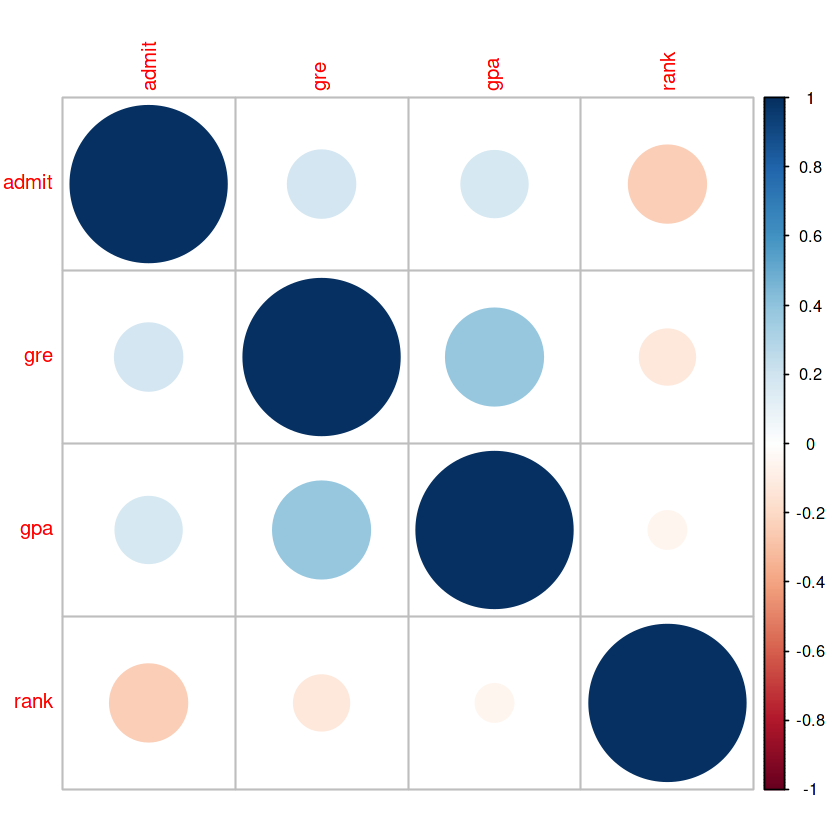

In [11]:
library(corrplot)
correlations <- cor(df)
corrplot(correlations, method="circle")

In [12]:
cor.test(df$admit, df$gre)


	Pearson's product-moment correlation

data:  df$admit and df$gre
t = 3.7437, df = 398, p-value = 0.0002081
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08797348 0.27746823
sample estimates:
      cor 
0.1844343 


In [13]:
cor.test(df$admit, df$gpa)


	Pearson's product-moment correlation

data:  df$admit and df$gpa
t = 3.6132, df = 398, p-value = 0.0003412
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.08158617 0.27151944
sample estimates:
      cor 
0.1782123 


In [14]:
cor.test(df$admit, df$rank)


	Pearson's product-moment correlation

data:  df$admit and df$rank
t = -4.987, df = 398, p-value = 9.175e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3326548 -0.1479803
sample estimates:
       cor 
-0.2425132 


# Split Data

In [15]:
install.packages("caTools")       
library(caTools)
library(Metrics)

# Splitting data in train and test data
split <- sample.split(df, SplitRatio = 0.7)
split
  
train <- subset(df, split == "TRUE")
test <- subset(df, split == "FALSE")
head(train)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




[1]  TRUE  TRUE FALSE FALSE

,admit,gre,gpa,rank
,<dbl>,<dbl>,<dbl>,<dbl>
1,0,380,3.61,3
2,1,660,3.67,3
5,0,520,2.93,4
6,1,760,3.00,2
9,1,540,3.39,3
10,0,700,3.92,2


# Logistic Regression

In [16]:
#df$rank <- factor(df$rank)
mylogit <- glm(admit ~ gre + gpa + rank, data = train)
summary(mylogit)


Call:
glm(formula = admit ~ gre + gpa + rank, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5898  -0.3316  -0.1986   0.5540   0.8977  

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.2852125  0.3029335  -0.942   0.3476  
gre          0.0003473  0.0002901   1.197   0.2326  
gpa          0.1691926  0.0887365   1.907   0.0580 .
rank        -0.0744769  0.0352971  -2.110   0.0361 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for gaussian family taken to be 0.2013946)

    Null deviance: 42.395  on 199  degrees of freedom
Residual deviance: 39.473  on 196  degrees of freedom
AIC: 253.04

Number of Fisher Scoring iterations: 2


In [17]:
# Log regression does have have R2
pscl::pR2(mylogit)["McFadden"]
# mylogit <- predict(mylogit, test, type='response')

fitting null model for pseudo-r2


McFadden 
0.05549918

In [18]:
caret::varImp(mylogit)

,Overall
,<dbl>
gre,1.197328
gpa,1.906686
rank,2.110001


# Linear Regression
Linear regression is often not suitable for classification problems. However, I ran the results just to see how the results could compare to logistic and other supervised learning models.

In [19]:
linearMod <- lm(admit ~ gre + gpa + rank, data=train)  
summary(linearMod)
linearPred <- predict(linearMod, test) 


Call:
lm(formula = admit ~ gre + gpa + rank, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5898 -0.3316 -0.1986  0.5540  0.8977 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.2852125  0.3029335  -0.942   0.3476  
gre          0.0003473  0.0002901   1.197   0.2326  
gpa          0.1691926  0.0887365   1.907   0.0580 .
rank        -0.0744769  0.0352971  -2.110   0.0361 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4488 on 196 degrees of freedom
Multiple R-squared:  0.06891,	Adjusted R-squared:  0.05466 
F-statistic: 4.836 on 3 and 196 DF,  p-value: 0.002864


In [20]:
# linear regression metrics:
lmR2 = R2(linearPred, test$admit)
lmRMSE = RMSE(linearPred, test$admit)
lmMAE = mae(linearPred, test$admit)
paste(lmR2, " linear r2")
paste(lmMAE, " linear MAE" )

[1] "0.121097111118775  linear r2"

[1] "0.397820649758566  linear MAE"

# Random Forest
Since there is a low amount of datapoints, random forest is a perfect predictive model. Because random forest does not overfit the model, it is often considered the most accurate supervised learning model. 

#### Tune Parameters

In [21]:
library(randomForest)
set.seed(120)  

forestMAE <- list()
forestR2  <- list()
forestDepth <- list()

for (x in 1:9) {
  classifier_RF = randomForest(x = train[-1],
                             y = train$admit,
                             ntree = 200,
                             maxdepth= x,
                            )
    #classifier_RF
    #print(classifier_RF)
    y_pred = predict(classifier_RF, newdata = test[-1])
    
    fR2 = R2(y_pred, test$admit)
    fRMSE = RMSE(y_pred, test$admit)
    fMAE = mae(y_pred, test$admit)
    
    forestMAE <- append(forestMAE, fMAE)
    forestR2 <- append(forestR2, fR2)
    forestDepth <- append(forestDepth, x)
}
#paste(forestMAE)
#paste(forestR2)
#paste(forestDepth)

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




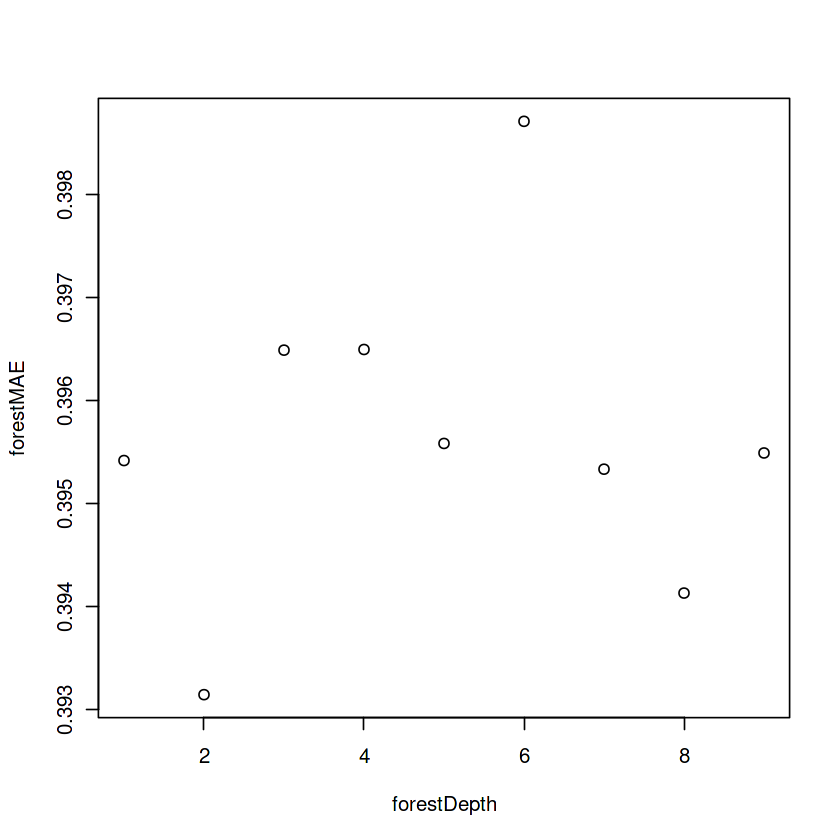

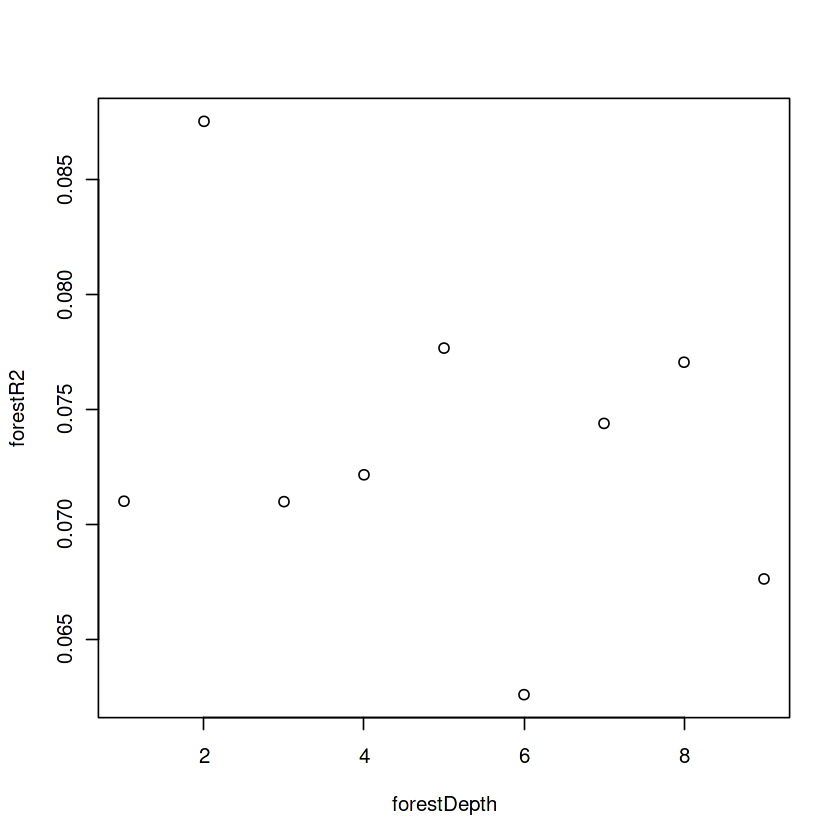

In [22]:
# Three for max depth seems to provide the least amount of MAE while providing a descent R2.
plot(forestDepth, forestMAE)
plot(forestDepth, forestR2)

In [23]:
forestMAE <- list()
forestR2  <- list()
forestTrees <- list(2, 5, 10, 50, 100, 200, 300, 400, 500)

for (tree in forestTrees) {
  classifier_RF = randomForest(x = train[-1],
                             y = train$admit,
                             ntree = tree,
                             maxdepth= 3,
                            )
    #classifier_RF
    #print(classifier_RF)
    y_pred = predict(classifier_RF, newdata = test[-1])
    
    fR2 = R2(y_pred, test$admit)
    fRMSE = RMSE(y_pred, test$admit)
    fMAE = mae(y_pred, test$admit)
    
    forestMAE <- append(forestMAE, fMAE)
    forestR2 <- append(forestR2, fR2)
    forestDepth <- append(forestDepth, tree)
}


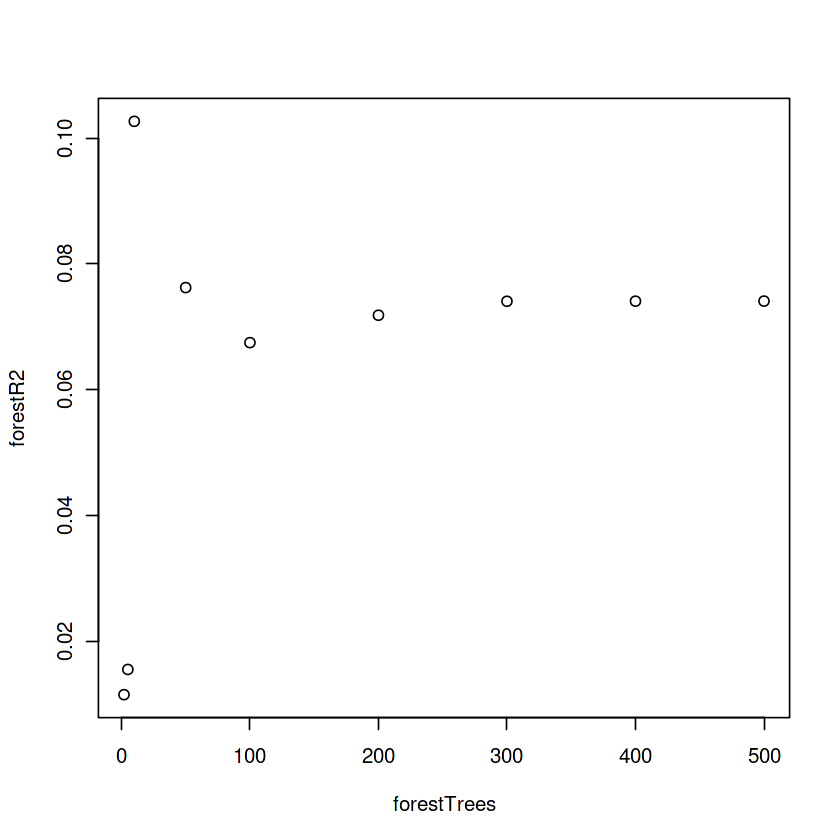

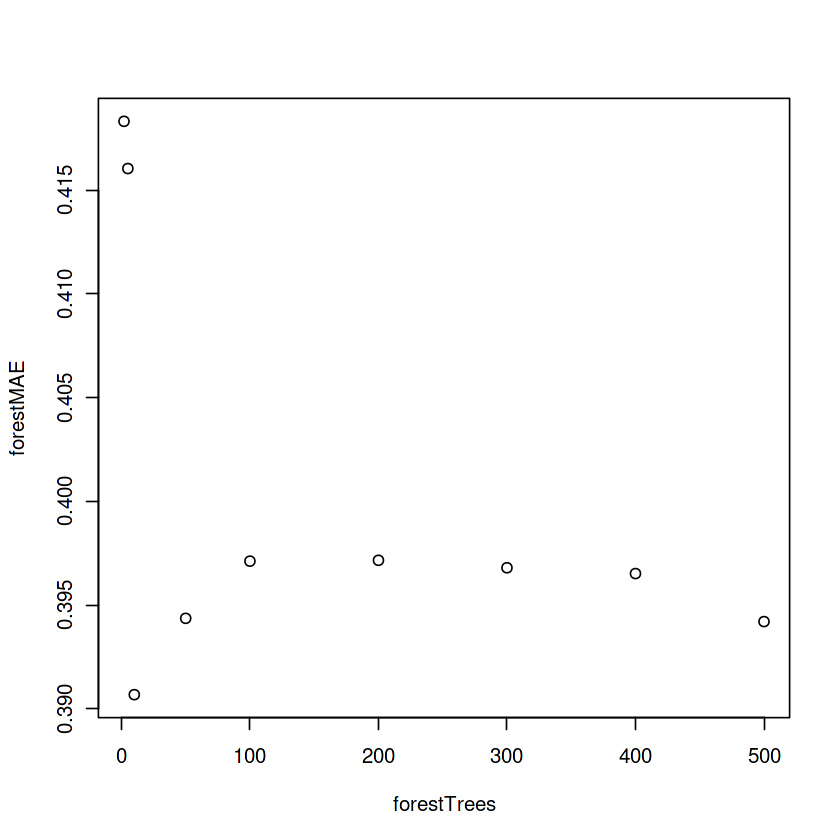

In [24]:
# 500 provides the best nTrees with least amount of error and high accuracy:
plot(forestTrees, forestR2)
plot(forestTrees, forestMAE)

0.003099447 0.01 
-0.00648867 0.01 


,mtry,OOBError
3,3,0.2198600
4,4,0.2184426


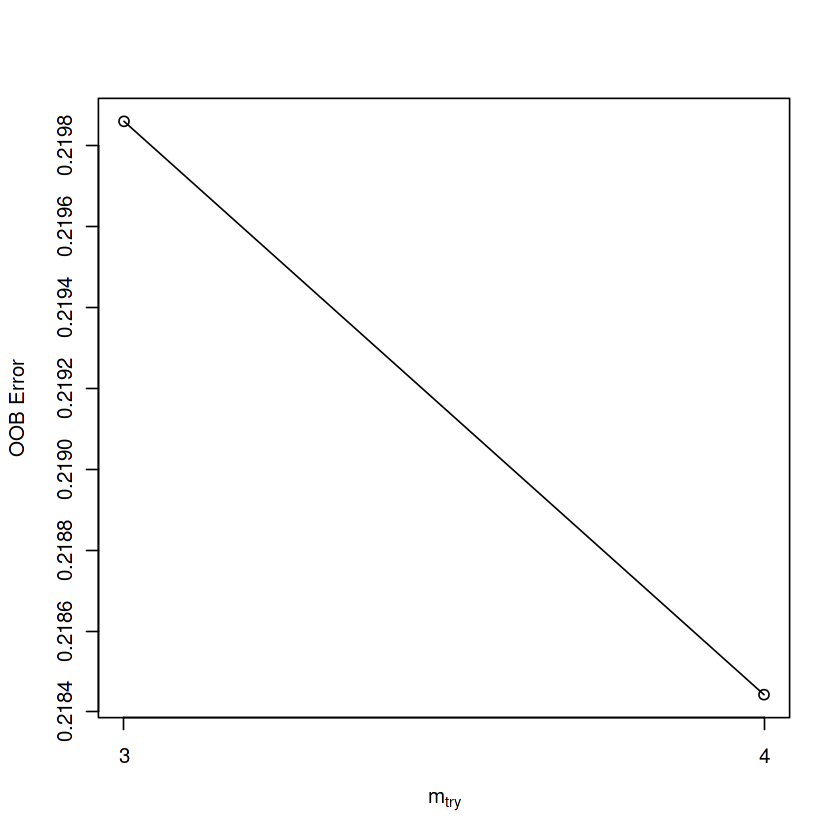

In [25]:
model_tuned <- tuneRF(
               x = train[-1],
               y = train$admit,
               ntreeTry=500,
               mtryStart=4, 
               stepFactor=1.5,
               improve=0.01,
               trace=FALSE #don't show real-time progress
               )
model_tuned

#### Final Forest Prediction

In [26]:
# Fitting Random Forest to the train dataset
classifier_RF = randomForest(x = train[-1],
                             y = train$admit,
                             ntree = 500,
                             maxdepth= 3,
                            )
classifier_RF


Call:
 randomForest(x = train[-1], y = train$admit, ntree = 500, maxdepth = 3) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 0.2061583
                    % Var explained: 2.74

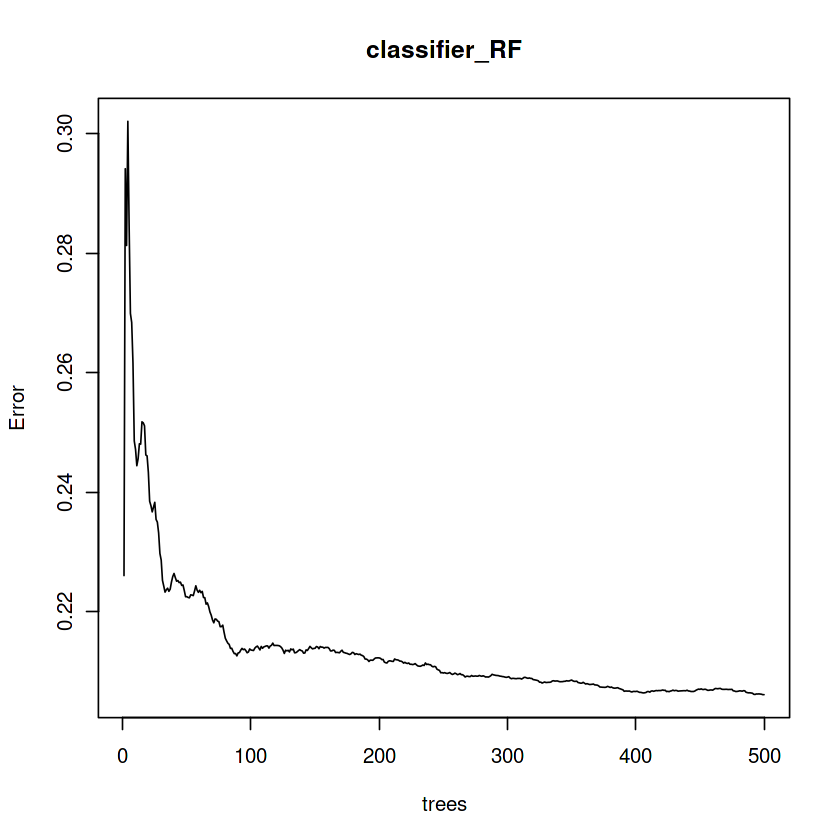

In [27]:
# Predicting the Test results:
y_pred = predict(classifier_RF, newdata = test[-1])
confusion_mtx = table(test[, 3], y_pred)

# Plotting model
plot(classifier_RF)

#### Importance Features

,IncNodePurity
gre,8.786664
gpa,11.093649
rank,3.569266


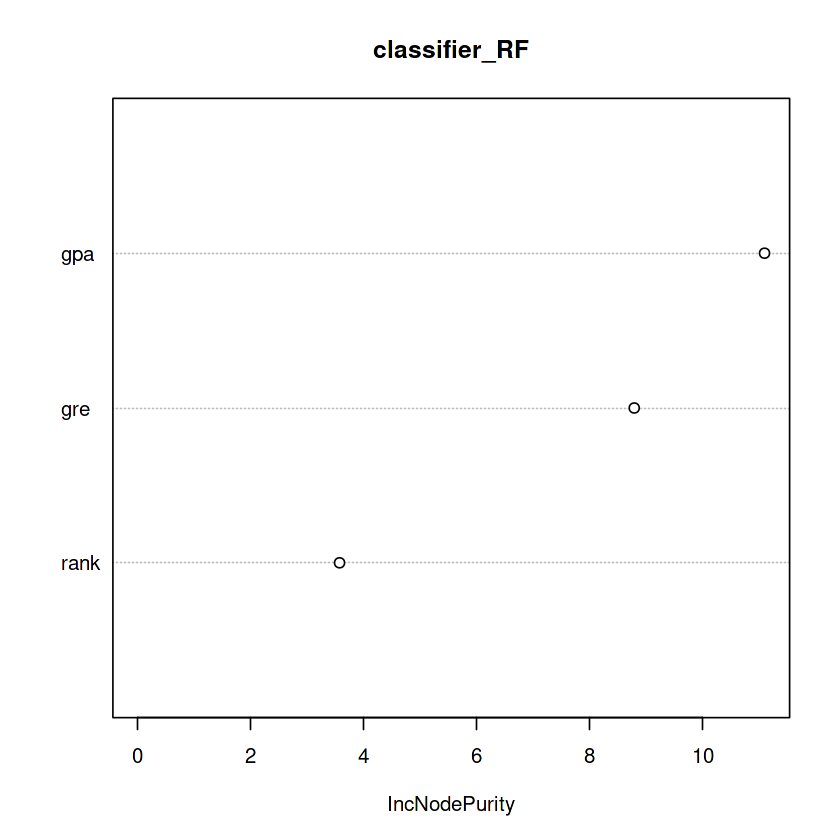

In [28]:
importance(classifier_RF)
varImpPlot(classifier_RF)

In [29]:
# random forest metrics:
forestR2 = R2(y_pred, test$admit)
forestRMSE = RMSE(y_pred, test$admit)
forestMAE = mae(y_pred, test$admit)
paste(forestR2, " forest r2")
paste(forestMAE, " forest MAE" )

[1] "0.0774156834380901  forest r2"

[1] "0.396617133600681  forest MAE"

# Decision Tree

In [30]:
library(rpart)
library(rpart.plot)
library(pROC)
library(tree)

Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following object is masked from ‘package:Metrics’:

    auc


The following objects are masked from ‘package:stats’:

    cov, smooth, var




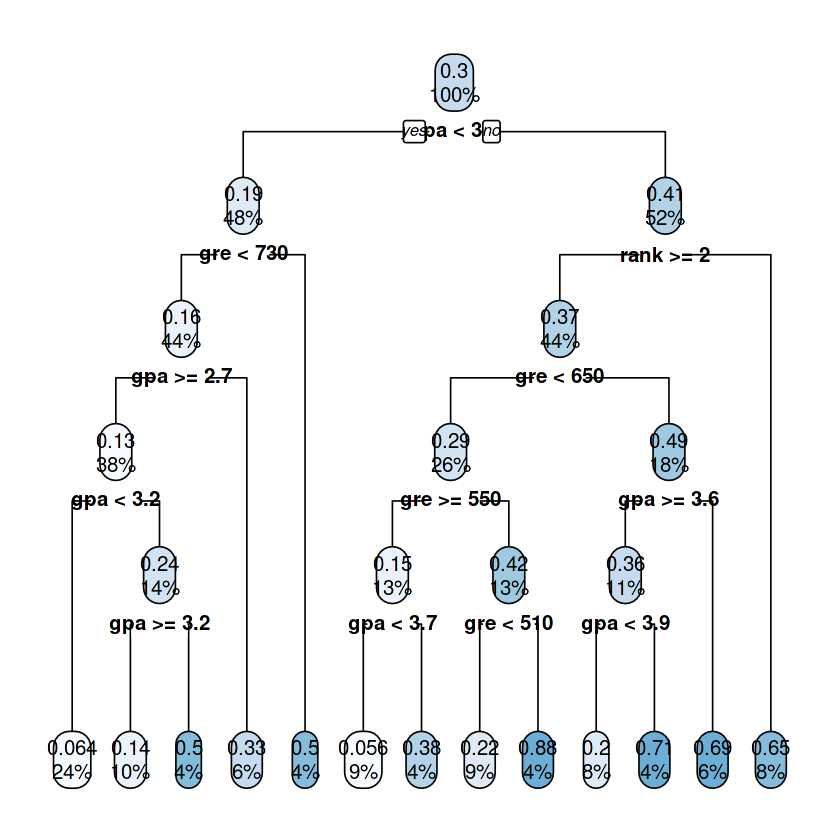

In [31]:
tree <- rpart(admit ~., data = train)
rpart.plot(tree)

# Future Admissions
The testAdmit file is for potential future students who have not been accepted or rejected yet. The students will be accepted by use of the previous year acceptance data.

In [32]:
testDF='../input/testadmit/testAdmit.xlsx'
testDF= read.xlsx(testDF, 1, header=TRUE)
head(testDF)

,gre,gpa,rank
,<dbl>,<dbl>,<dbl>
1,598,3.61,3
2,437,3.67,3
3,332,4.00,1
4,693,3.19,4
5,658,2.93,4
6,408,3.00,2


# Final Prediction of New Data

In [33]:
y_pred = predict(classifier_RF, newdata = testDF)
y_pred

1          2          3          4          5          6          7 
0.25826171 0.38976685 0.45934918 0.17558958 0.09331928 0.22189254 0.25431235 
         8          9         10         11         12         13         14 
0.10240426 0.38607779 0.32042019 0.37815061 0.25216997 0.49746846 0.10987646 
        15         16         17         18         19         20         21 
0.43710800 0.31144709 0.25690105 0.26064977 0.49776859 0.64992676 0.28752716 
        22         23         24         25         26         27         28 
0.32080691 0.08799028 0.15742894 0.32194321 0.54381162 0.52357689 0.31513955 
        29         30         31         32         33         34         35 
0.27772192 0.28559664 0.33311250 0.31556553 0.26385472 0.25397397 0.20935205 
        36         37         38         39         40         41         42 
0.12002719 0.23500161 0.21643875 0.12164912 0.13870783 0.27322250 0.44208131 
        43         44         45         46         47         48         49 
0.09905890 0.11611970 0.13943223 0.42405511 0.39243497 0.06976549 0.12667207

In [34]:
# Greater than .2 is accepted
y_pred <- ifelse(y_pred > 0.2, 1, 0)
y_pred

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  0  0  1  1  0  1  1  1  1  1  0  1  1  1  1  1  1  1  1  0  0  1  1 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
 1  1  1  1  1  1  1  1  1  0  1  1  0  0  1  1  0  0  0  1  1  0  0

In [35]:
newDF <- data.frame(y_pred)
head(newDF)

,y_pred
,<dbl>
1,1
2,1
3,1
4,0
5,0
6,1


#### New Excel Result

In [36]:
newFile="results.xlsx"
#fwrite(df, newFile)
paste("New File Created")
write.xlsx(newDF, newFile, sheetName = "new")

[1] "New File Created"